{(0.43658652935005837, 0.06765627262352458): [(0.7606066452754299, 0.8193882623138385), (0.033160318115246, 0.8978070755114849), (0.42206191772999957, 0.7341931688404487)], (0.2394702915778486, 0.9109122958511024): [(0.7606066452754299, 0.8193882623138385), (0.033160318115246, 0.8978070755114849), (0.42206191772999957, 0.7341931688404487)], (0.7606066452754299, 0.8193882623138385): [(0.43658652935005837, 0.06765627262352458), (0.2394702915778486, 0.9109122958511024), (0.42206191772999957, 0.7341931688404487)], (0.033160318115246, 0.8978070755114849): [(0.43658652935005837, 0.06765627262352458), (0.2394702915778486, 0.9109122958511024), (0.42206191772999957, 0.7341931688404487)], (0.42206191772999957, 0.7341931688404487): [(0.43658652935005837, 0.06765627262352458), (0.2394702915778486, 0.9109122958511024), (0.7606066452754299, 0.8193882623138385), (0.033160318115246, 0.8978070755114849)]}


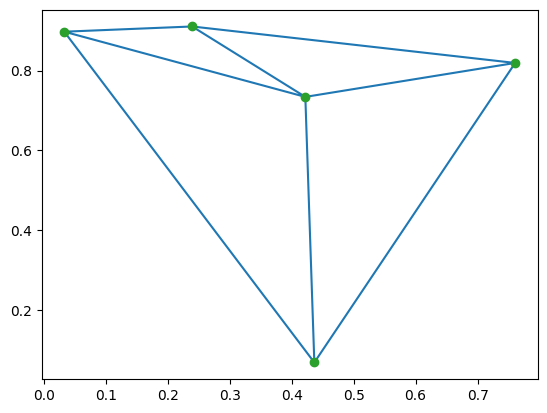

In [32]:
import random
import matplotlib.pyplot as plt 
from scipy.spatial import Delaunay
import numpy as np

class ColorMap:
    def __init__(self, N):
        self.N = N
        self.points = np.array([[random.uniform(0,1),random.uniform(0,1)] for _ in range(self.N)])
        self.tri = Delaunay(self.points)

    def obtain_neighbours(self, pindex):
        neighbors = list()
        for simplex in self.tri.simplices:
            if pindex in simplex:
                neighbors.extend([simplex[i] for i in range(len(simplex)) if simplex[i] != pindex])

        return list(set(neighbors))

    def create_csp_neighbour_dictionary(self):
        D = {}
        for i in range(self.N):
            index_list = self.obtain_neighbours(i)
            vertex_list = [tuple(self.tri.points[k]) for k in index_list]
            D[(self.tri.points[i][0], self.tri.points[i][1])] = vertex_list
        return D
    
    def display_points(self):
        plt.triplot(self.points[:,0], self.points[:,1], self.tri.simplices)
        plt.plot(self.points[:,0], self.points[:,1], 'o')
        plt.show()
        

color_map = ColorMap(5)
DD = color_map.create_csp_neighbour_dictionary()
print(DD)
color_map.display_points()